In [33]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
from PIL import Image;
from wordcloud import WordCloud, STOPWORDS

## Assume we have a dataset with sales and products

In [16]:
products = pd.read_csv('products.csv', index_col=0)
sales = pd.read_csv('sales.csv', index_col=0)

sales.head()

,OrderDate,OrderNumber,OrderLineItem,ProductSold,SoldTo,SoldIn,OrderQuantity,SoldBy,Shipping_Type,Order_Status
0,4/5/2017,SO67694,1,605,12754,7,1,284,Self Pickup,ok
1,4/5/2017,SO67666,1,478,23327,7,2,284,Self Pickup,ok
2,4/5/2017,SO67695,3,477,29357,7,2,284,Self Pickup,ok
3,4/5/2017,SO67663,1,536,24222,6,2,284,Self Pickup,ok
4,4/5/2017,SO67677,3,220,24845,6,1,284,Self Pickup,ok


## Let's find related products

- These are the products that people usually put together in one order/basket

In [12]:
# group orders by order number and save all the product IDs that are in the orders
groups = df.groupby('OrderNumber')['ProductSold'].apply(lambda x: list(x))
groups.head(), groups.shape

(OrderNumber
 SO45079    [312]
 SO45080    [332]
 SO45081    [338]
 SO45082    [350]
 SO45083    [312]
 Name: ProductSold, dtype: object,
 (25164,))

In [13]:
# select the orders with more than one product
prod_groups = groups.to_frame()
common_prod_groups = prod_groups.loc[prod_groups.ProductSold.str.len() > 1]

In [18]:
# we need to exclude the main product from the orders
bikes_ids = products[products['SubcategoryID'].isin([1, 2, 3])].ID.to_list()
supportive_products_list = common_prod_groups.ProductSold.values.tolist()
supportive_products_list = [item for sublist in supportive_products_list for item in sublist if item not in bikes_ids]
supportive_products = pd.Series(supportive_products_list, name='ID')

In [19]:
#create a bag of names of all related products
names_list = pd.merge(supportive_products, products[['ID', 'ProductName']], on='ID', how='left').ProductName.tolist()
names_text = ' '.join(names_list)

In [26]:
names_text[:300]

'Road Bottle Cage Sport-100 Helmet, Black Mountain Bottle Cage Water Bottle - 30 oz. Road Tire Tube All-Purpose Bike Stand HL Road Tire Road Bottle Cage Long-Sleeve Logo Jersey, M Water Bottle - 30 oz. Sport-100 Helmet, Red Road Tire Tube Sport-100 Helmet, Red HL Road Tire Long-Sleeve Logo Jersey, L '

## Let's make a cloud!

- I will use the bag of the related product names for word cloud visualization
- I expect to get the most frequently purchased products to be in larger size
- I also want to apply a mask to make the visual more attractive

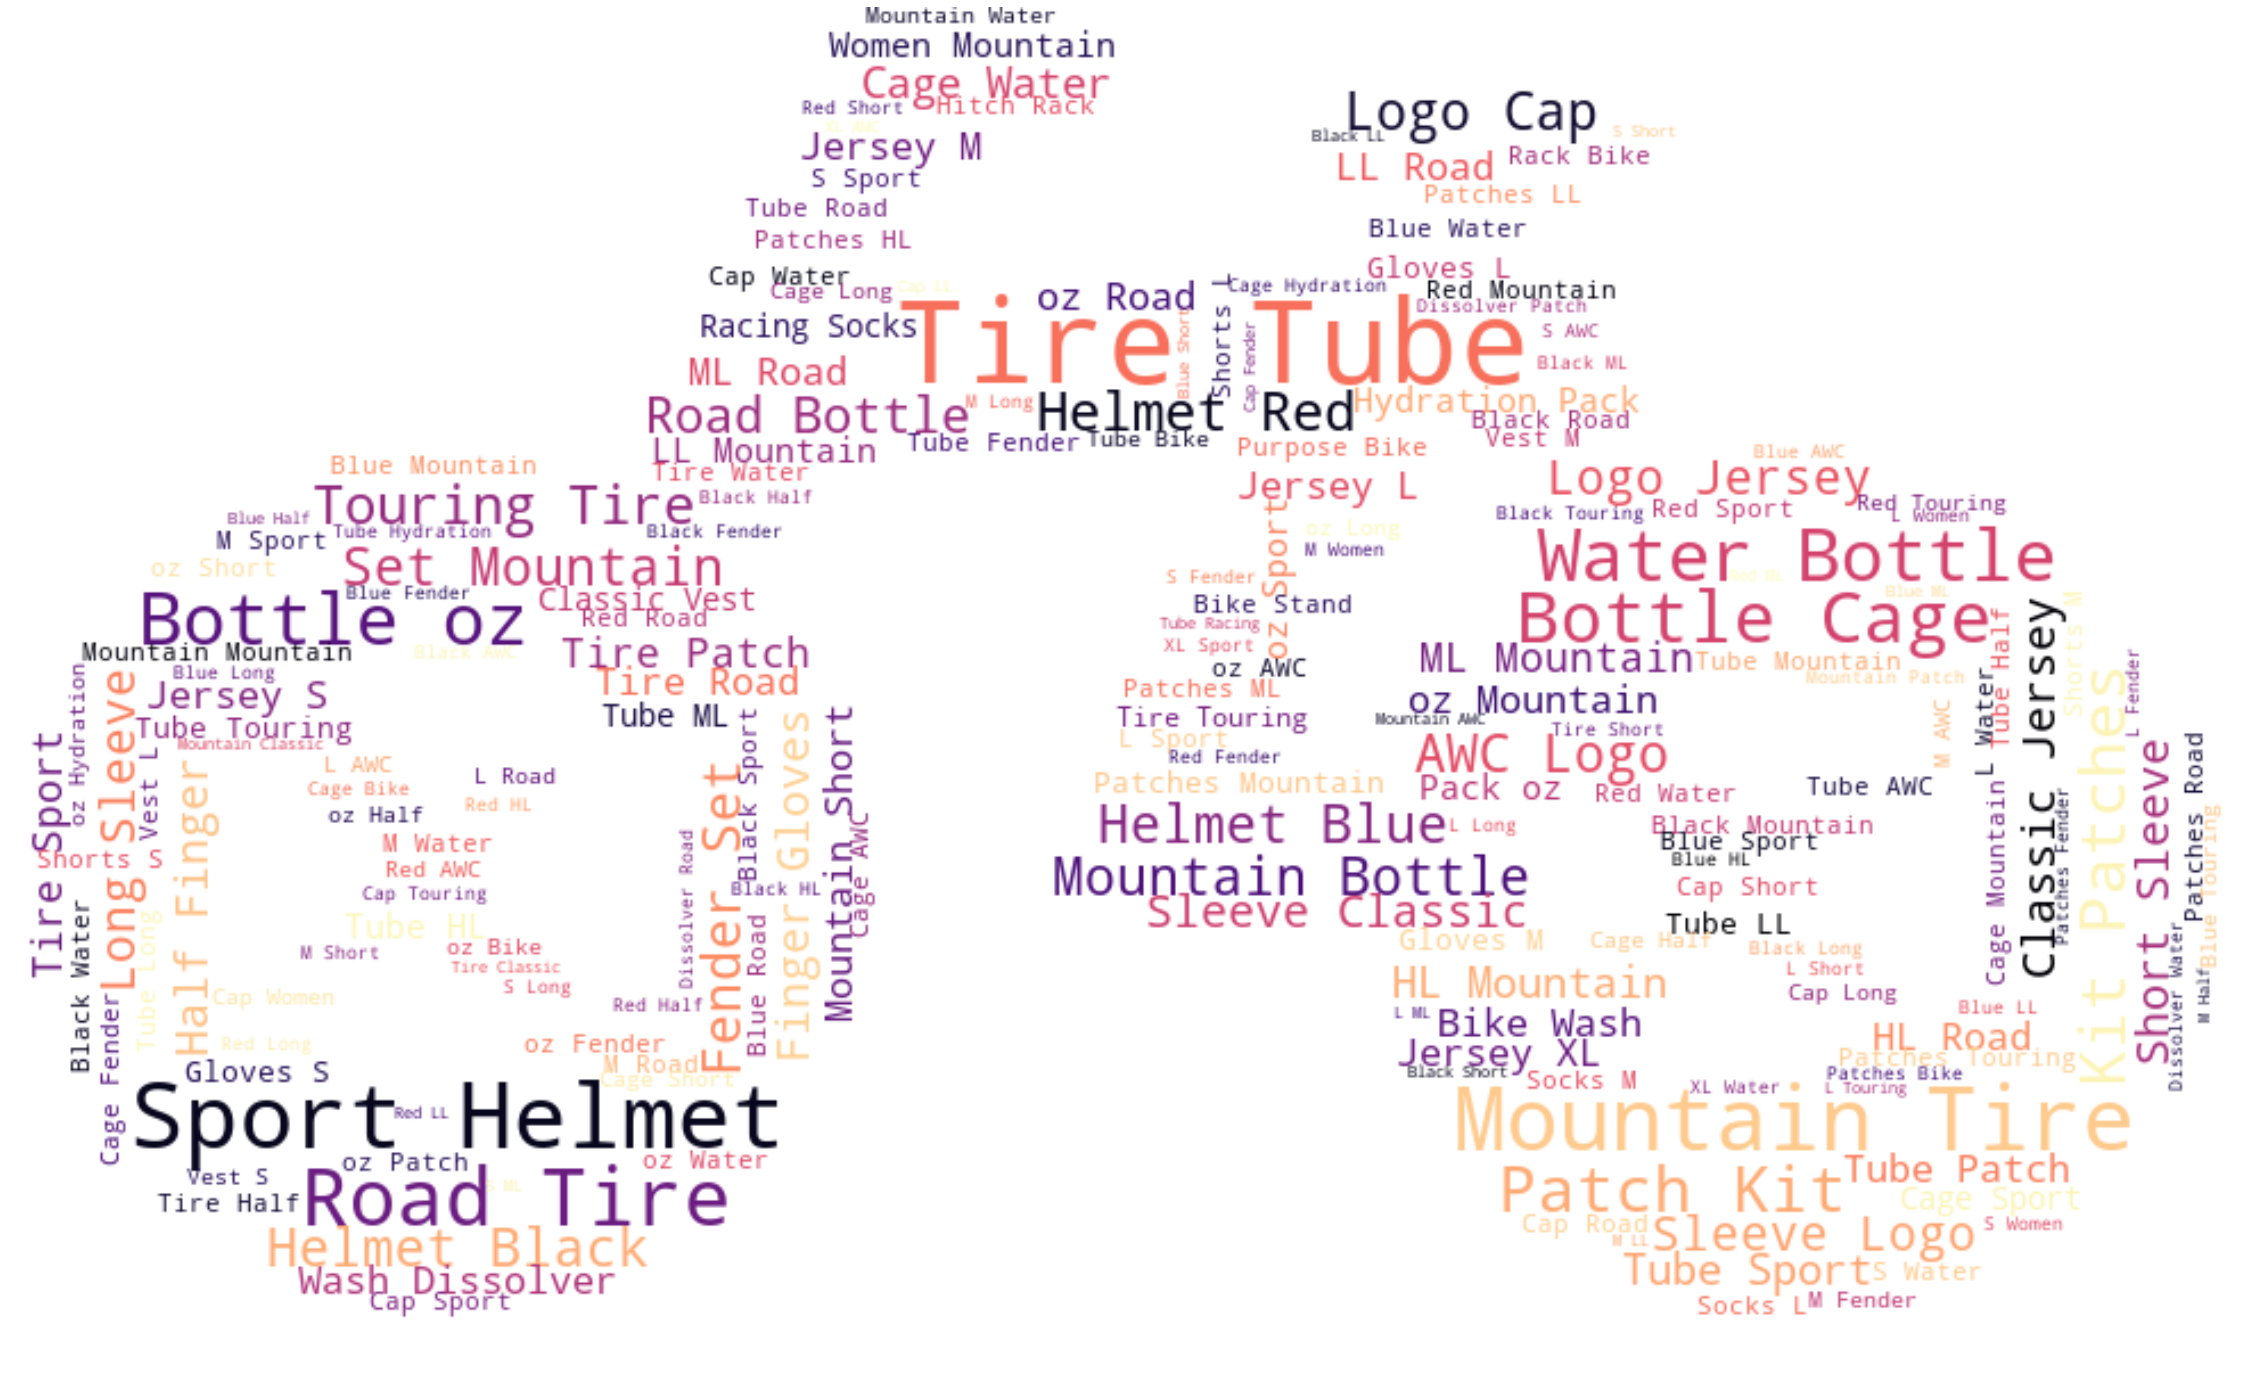

In [38]:
# create a word cloud
plt.subplots(figsize=(40, 40))

# removing stopwords
stopwords = set(STOPWORDS)

# import the mask as array
bike_mask = np.array(Image.open('bike_b.jpg'))

wordcloud = WordCloud(stopwords=stopwords,
                      collocations=True, 
                      width=1200,
                      height=800,
                      margin=0,
                      contour_width=0,
                      background_color="white",
                      colormap='magma',
                      mask=bike_mask).generate(names_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('bike_word_cloud.png')
plt.show()